## *** This project contains several interactive maps and GitHub will not display them ***

#### Please view this project using NB Viewer: 

https://nbviewer.jupyter.org/

# Felonies Involving a Dangerous Weapon Near New York Schools in 2019
### IBM Data Science Capstone Project
### Author: Anthony Albertyn

# 1. Introduction

### 1.1 Background
A quick online search will reveal that crime in New Your state has been falling since the 1990's but in 2019 there were still a significant number of felony-level crimes committed with a dangerous weapon. Teenagers can be on both ends, as perpetrators as well as victims, and can potentially suffer trauma and injury if they are about when these crimes are committed. The NYPD does publish crime statistics and various organisations create different kinds of crime maps to visulise the data. I could find various media reports on schools with highest crime rayes, but these usually focused on a specific area, like Brooklyn, or were out of date, or did not break down the crimes down sufficiently or did not plot the schools on a map. The idea for this research was born when the realised that there was a gap in this information, and because of my perception of the need to do more to help teenagers in New Your state avoid violence.

### 1.2 Aim
The aim of the research is to analyse crime data in New York city and relate that to nearby high schools to find the most at-risk schools where children could get caught up in serious violent crime.

### 1.3 Objectives

1. Cluster high schools in New York state by number of felonies committed in 2019, within a 500m radius of the school between the hours of 7am to 9am and 2pm to 6pm
2. Find the top-twenty high schools in New York state with the highest amount of crimes determined in objective one

### 1.4 Research question
Which high schools in New York state had the highest number of felonies, involving a dangerous weapon, in 2019?

### 1.5 Audience
The research may be of interest to law enforcement, education authorities and social support organisations in New York state who have an interest in protecting teenagers from serious crime committed near their schools.

### 1.6 Value
The research will be important to this audience because it can help identify areas and high schools where school children are at risk of being harmed by serious crime, and allow the authorities to identify where best to focus limited resources to tackle the problem.

# 2. Data

### 2.1 Data sources

The data sources used for this project are:  

Publisher: NYC Open Data  
Data set: NYPD Complaint Data Historic  
Resource link: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i  
Columns of data: 35  
Rows of data: 6.5 million  
Format: CSV  

Published: Foursquare  
Data: From developer API  
Resource link: https://foursquare.com/developers  
Format: JSON 

### 2.2 Data limitation

The Foursquare data is of a lower quality than the NYPD data because the Foursquare data is submitted by Foursquare users, and due to the volume of the data received, Foursquare probably cannot verify all the data. Some problems encountered with Foursquare data was duplication of venues, region in city name, city name left blank, city name in state field. The Foursquare data might not include all high schools in New York state either. This capstone project specifically requires the use of Foursquare location data, and if this was a commercial project, the author would use an alternative more comprehensive data set for New York high schools.

### 2.3 Example NYPD Compiant Data

| INDEX | CMPLNT_FR_DT | CMPLNT_FR_TM | OFNS_DESC          | LAW_CAT_CD | CRM_ATPT_CPTD_CD | Latitude   | Longitude  |
| ----- | ------------ | ------------ | ------------------ | ---------- | ---------------- | ---------- | ----------- 
| 55918	| 01/01/2019   |	16:25:00  |	DANGEROUS WEAPONS  | FELONY	    | COMPLETED        | 40.701528  | -73.943227 |
| 191874| 01/02/2019   |	17:40:00  |	DANGEROUS WEAPONS  | FELONY	    | COMPLETED	       | 40.703760  | -73.799150 |
| 276587| 01/05/2019   |	20:05:00  |	DANGEROUS WEAPONS  | FELONY	    | COMPLETED	       | 40.683173  | -73.808468 |
| 276646| 02/06/2019   |	14:48:00  |	DANGEROUS WEAPONS  | FELONY	    | COMPLETED	       | 40.707495  | -73.933920 |
| 276649| 02/07/2019   |	01:33:00  |	DANGEROUS WEAPONS  | FELONY	    | COMPLETED	       | 40.821867  | -73.897373 |

### 2.4 Example Foursquare data

In [5]:
JSON = """"venue": {
              "id": "44e9fddaf964a520bb371fe3",
              "name": "Stuyvesant High School",
              "contact": {
                "phone": "2123124800",
                "formattedPhone": "(212) 312-4800",
                "twitter": "stuyvesanthigh",
                "facebook": "112007138816093",
                "facebookName": "Stuyvesant High School"
              },
              "location": {
                "address": "345 Chambers St",
                "crossStreet": "at West St.",
                "lat": 40.717608879529976,
                "lng": -74.01320281198944,
                "labeledLatLngs": [
                  {
                    "label": "display",
                    "lat": 40.717608879529976,
                    "lng": -74.01320281198944
                  }
                ],
                "distance": 6406,
                "postalCode": "10282",
                "cc": "US",
                "neighborhood": "Battery Park City",
                "city": "New York",
                "state": "NY",
                "country": "United States",
                "contextLine": "Battery Park City",
                "contextGeoId": 7620,
                "formattedAddress": [
                  "<span itemprop=\"streetAddress\">345 Chambers St</span> (at West St.)",
                  "<span itemprop=\"addressLocality\">New York</span>, <span itemprop=\"addressRegion\">NY</span> <span itemprop=\"postalCode\">10282</span>",
                  "United States"
                ]
              },"""

# 3. Methodology

### 3.1 Data extraction process

The data was be extracted as follows:  

1. Filtered the NYPD Complaint data by year (2019), level of crime (felony), description of crime (dangerous weapon), time of crime (between 7am to 9pm and between 2pm to 6pm) and crime completed (true).

2. The latitude and longitude data for each of these felonies were used to do an API call to Foursquare to find venues with category 'high school' within a radius of 500 m from the crime.

3. A list of these high schools, including their venue id, name, city, latitude and longitude data was compiled. This list contained no high schools that did not have any felonies committed near them because they were found by their distance from a felony.

4. The list of schools was cleaned and grouped by venue id, and a count column was added - so it is known how many crimes linked to a specific this school as a venue by proximity to it.

### 3.2 Data Analysis process

The data was analysed as follows:  

1. K-means ML analysis was applied to the high school data to cluster the schools by count of nearby felony crimes and a cluster label was be added to the school data in a new column.

2. The high school data was then sorted in descending order by number of felonies and the top twenty records were extracted.

### 3.3 Data visulisation process

The data was visulised as follows  

1. Plot felony crimes on its own map using Folium.

2. Plot high schools clusters on a map sing Folium.

3. Print top twenty high schools including the total number of crimes for each school.

5. Plot the top twenty high schools on a map using Folium.

# 4. Analysis

#### Import libraries

In [71]:
print("Importing libraries ...")

# pandas
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas.io.json import json_normalize

# numpy
import numpy as np

# matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt; plt.rcdefaults()

# sklearn
from sklearn.cluster import KMeans

# scipy
from scipy.spatial.distance import cdist

# requests
import requests

# json
import json

# matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

# folium
# !conda install -c conda-forge folium=0.5.0 --yes
import folium

print("Libraries import done")

Importing libraries ...
Libraries import done


#### Load NYPD data

In [7]:
print("Loading 2.22GB NYPD data ...")

# very large file so this will take a while to load
# this file was downloaded from https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i 
filename = '/Users/anthonyalbertyn/Downloads/NYPD_Complaint_Data_Historic.csv'
df_nypd = pd.read_csv(filename, low_memory=False)

print("NYPD data import done")

Loading 2.22GB NYPD data ...
NYPD data import done


#### Explore NYPD data

In [10]:
# column headings
print(df_nypd.columns)

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')


In [11]:
# data types
print(df_nypd.dtypes)

CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
ADDR_PCT_CD          float64
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
BORO_NM               object
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
JURIS_DESC            object
JURISDICTION_CODE    float64
PARKS_NM              object
HADEVELOPT            object
HOUSING_PSA           object
X_COORD_CD           float64
Y_COORD_CD           float64
SUSP_AGE_GROUP        object
SUSP_RACE             object
SUSP_SEX              object
TRANSIT_DISTRICT     float64
Latitude             float64
Longitude            float64
Lat_Lon               object
PATROL_BORO           object
STATION_NAME          object
VIC_AGE_GROUP         object
VIC_RACE              object
VIC_SEX       

In [12]:
# statistics
print(df_nypd.describe())

         CMPLNT_NUM   ADDR_PCT_CD         KY_CD         PD_CD  \
count  6.983207e+06  6.981041e+06  6.983207e+06  6.977342e+06   
mean   5.500768e+08  6.327224e+01  2.957909e+02  4.148457e+02   
std    2.597838e+08  3.451961e+01  1.499370e+02  2.180586e+02   
min    1.000001e+08 -9.900000e+01  1.010000e+02  1.000000e+02   
25%    3.252107e+08  4.000000e+01  1.170000e+02  2.540000e+02   
50%    5.500624e+08  6.300000e+01  3.410000e+02  3.860000e+02   
75%    7.750561e+08  9.400000e+01  3.510000e+02  6.370000e+02   
max    9.999999e+08  1.230000e+02  8.810000e+02  9.750000e+02   

       JURISDICTION_CODE    X_COORD_CD    Y_COORD_CD  TRANSIT_DISTRICT  \
count       6.977342e+06  6.959143e+06  6.959143e+06     157084.000000   
mean        7.304343e-01  1.004796e+06  2.070544e+05         13.598400   
std         6.752324e+00  2.174732e+04  3.153994e+04         12.471429   
min         0.000000e+00  1.110000e+02  1.110000e+02          1.000000   
25%         0.000000e+00  9.916830e+05  1.84

#### Reduce columns and filter NYPD data

In [13]:
# reduce columns
df_nypd = df_nypd[['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'LAW_CAT_CD', 'CRM_ATPT_CPTD_CD', 'Latitude', 'Longitude']]


In [14]:
# filter data
df_nypd = df_nypd.loc[(df_nypd['CMPLNT_FR_DT'].str.contains('2019')) & (df_nypd['OFNS_DESC'].str.contains('DANGEROUS WEAPONS')) & (df_nypd['LAW_CAT_CD'] == 'FELONY') & (df_nypd['CRM_ATPT_CPTD_CD'] == 'COMPLETED')]

In [15]:
# explore the reduced and filtered NYPD data
print("data shape:")
print(df_nypd.shape)
print("sample data:")
print(df_nypd.head())

data shape:
(4182, 7)
sample data:
       CMPLNT_FR_DT CMPLNT_FR_TM          OFNS_DESC LAW_CAT_CD  \
55918    01/01/2019     16:25:00  DANGEROUS WEAPONS     FELONY   
191874   01/02/2019     17:40:00  DANGEROUS WEAPONS     FELONY   
276587   01/05/2019     20:05:00  DANGEROUS WEAPONS     FELONY   
276646   02/06/2019     14:48:00  DANGEROUS WEAPONS     FELONY   
276649   02/07/2019     01:33:00  DANGEROUS WEAPONS     FELONY   

       CRM_ATPT_CPTD_CD   Latitude  Longitude  
55918         COMPLETED  40.701528 -73.943227  
191874        COMPLETED  40.703760 -73.799150  
276587        COMPLETED  40.683173 -73.808468  
276646        COMPLETED  40.707495 -73.933920  
276649        COMPLETED  40.821867 -73.897373  


In [17]:
# filter NYPD data by crimes committed between 7am and 9am and between 2pm and 6pm

# change the start time to only hours
df_nypd['CMPLNT_FR_TM'] = df_nypd['CMPLNT_FR_TM'].str.slice(start=0, stop=2)

# filter by time (hours) - example 07 is good to represent 07:00 to 07:59
hours = ['07', '08', '14', '15', '16', '17']
df_nypd = df_nypd.loc[(df_nypd['CMPLNT_FR_TM'].isin(hours))]

In [18]:
# remove rows with null values in any of its columns
df_nypd = df_nypd.dropna()

# reset the indexes for NYPD data
df_nypd.reset_index(inplace=True, drop=True)

In [19]:
# check a sample of the NYPD data
print(df_nypd.head())

  CMPLNT_FR_DT CMPLNT_FR_TM          OFNS_DESC LAW_CAT_CD CRM_ATPT_CPTD_CD  \
0   01/01/2019           16  DANGEROUS WEAPONS     FELONY        COMPLETED   
1   01/02/2019           17  DANGEROUS WEAPONS     FELONY        COMPLETED   
2   02/06/2019           14  DANGEROUS WEAPONS     FELONY        COMPLETED   
3   04/10/2019           14  DANGEROUS WEAPONS     FELONY        COMPLETED   
4   04/11/2019           14  DANGEROUS WEAPONS     FELONY        COMPLETED   

    Latitude  Longitude  
0  40.701528 -73.943227  
1  40.703760 -73.799150  
2  40.707495 -73.933920  
3  40.676504 -73.913697  
4  40.677278 -73.957979  


In [21]:
# check the distribution of crime times after filtering the data
print(df_nypd['CMPLNT_FR_TM'].value_counts())

17    281
16    248
15    175
14    166
07     77
08     62
Name: CMPLNT_FR_TM, dtype: int64


In [24]:
# remove columns that are not required
df_nypd = df_nypd[['Latitude', 'Longitude']]

In [25]:
# check the size of the filtered NYPD data set
print(df_nypd.shape)

(1009, 2)


In [27]:
# check a sample of the filtered data set
print(df_nypd.head())
print(df_nypd.tail())

    Latitude  Longitude
0  40.701528 -73.943227
1  40.703760 -73.799150
2  40.707495 -73.933920
3  40.676504 -73.913697
4  40.677278 -73.957979
       Latitude  Longitude
1004  40.574140 -74.106008
1005  40.822083 -73.890330
1006  40.820927 -73.943324
1007  40.656906 -73.885091
1008  40.687713 -73.963662


#### Visulise filtered NYPD data - Felony with a dangerous weapon in 2019

In [30]:
# create map of NYPD crime data
map_of_crimes= folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# add markers to map
for Latitude, Longitude in zip(df_nypd['Latitude'], df_nypd['Longitude']):
    label = 'Year: 2019, Crime: Felony with dangerous weapon'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [float(Latitude), float(Longitude)],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#dc143c',
        fill_opacity=0.7,
        parse_html=False).add_to(map_of_crimes)  
    
map_of_crimes

#### Setup creentials for Foursquare API

In [170]:
CLIENT_ID = '********************' # your Foursquare ID
CLIENT_SECRET = '********************' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#### Set default values for API calls

In [33]:
# Foursquare API limit value
LIMIT = 100

# radius around latitide and longitude to find nearby venues
radius = 500

# venue category id for high schools
categoryId = '4bf58dd8d48988d13d941735'

#### Get high school data using Foursquare API

In [34]:
# this process will take some time as the code will do 1009 API calls to Foursquare
# one api call for each crime, based on the latitude and longitude of the crime

# this code is not clean, but will get the job done
# the code could be improved by breaking it into smaller parts and calling functions

# initialise variables
crimes_near_high_schools = []
high_schools_with_nearby_crimes = []
count = 0
total = 1009

# iterate over NYPD crime data
for Latitude, Longitude in zip(df_nypd['Latitude'], df_nypd['Longitude']):
    # setup the API end point for a specific item based on the location of a specific crime
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    Latitude,
    Longitude,
    radius,
    categoryId,
    LIMIT)
    
    # make an API call using the above url
    results = requests.get(url).json()
    
    # initialise variables
    number_schools = 0
    status = 999
    
    # track the success of the api call
    if 'response' in results and 'totalResults' in results['response']:
        number_schools = results['response']['totalResults']
        status = 200
        
    # handle the data that was returend by the API call
    if 'response' in results and 'groups' in results["response"] and len(results["response"]['groups']) > 0 and 'items' in results["response"]['groups'][0]:
        # extract the venue (high school) data based on proximity to a spscific crime
        venues = results["response"]['groups'][0]['items']
        for v in venues:
            id = ''
            name = ''
            lat = ''
            lng = ''
            city = ''
            state = ''
            country = ''
            if 'id' in v['venue']:
                id = v['venue']['id']
            if 'name' in v['venue']:
                name = v['venue']['name']
            if 'location' in v['venue']:
                if 'lat' in v['venue']['location']:
                    lat = v['venue']['location']['lat']
                if 'lng' in v['venue']['location']:
                    lng = v['venue']['location']['lng']  
                if 'city' in v['venue']['location']:
                    city = v['venue']['location']['city']
                if 'state' in v['venue']['location']:
                    state = v['venue']['location']['state']
                if 'country' in v['venue']['location']:
                    country = v['venue']['location']['country']
            # add high school data to a list
            high_schools_with_nearby_crimes.append([id, name, lat, lng, city, state, country])
    
    # track the success of the api call for each nypd crime latitude and longitude
    crimes_near_high_schools.append([Latitude, Longitude, number_schools, status])
    
    # track progress
    count = count + 1
    if count == 1:
        print("Searching for high schools ...")
    if count == 200:
        print("progress ... 20%")
    if count == 400:
        print("progress ... 40%")
    if count == 600:
        print("progress ... 60%")    
    if count == 800:
        print("progress ... 80%")
    if count == 900:
        print("progress ... 90%")
    if count == 950:
        print("progress ... 95%")

# process complete
print("done")

Searching for high schools ...
progress ... 20%
progress ... 40%
progress ... 60%
progress ... 80%
progress ... 90%
progress ... 95%
done


#### Convert the created lists to data frames

In [35]:
# convert to numpy arrays
crime_data = np.array(crimes_near_high_schools)
high_school_data = np.array(high_schools_with_nearby_crimes)

# convert to data frames
df_crime_data = pd.DataFrame(data=crime_data, columns=["crime_lat", "crime_lng", "num_schools", "ststus"])
df_high_school_data = pd.DataFrame(data=high_school_data, columns=["venue_id", "high_school_name","school_lat", "school_lng", "city", "state", "country"])


In [37]:
# check how many api calls to Foursquare failed
# API requests that failed
df_crime_data_issues = df_crime_data.loc[(df_crime_data['ststus'] > 200)]
print(df_crime_data_issues.shape)

(0, 4)


The author will assume that all the API calls succeeded as there was no calls that received the default 999 status

#### Explore the data connecting high schools to crime locations

In [39]:
# crimes that were within 500 meters radius from a high school
df_crimes_near_schools = df_crime_data.loc[(df_crime_data['num_schools'] > 0.0) & (df_crime_data['ststus'] == 200)]
print(df_crimes_near_schools.shape)

(630, 4)


In [40]:
# check sample data from crimes near schools
print(df_crimes_near_schools.head())

   crime_lat  crime_lng  num_schools  ststus
0  40.701528 -73.943227          2.0   200.0
1  40.703760 -73.799150          3.0   200.0
2  40.707495 -73.933920          4.0   200.0
3  40.676504 -73.913697          2.0   200.0
4  40.677278 -73.957979          1.0   200.0


In [41]:
# check the size of the schools data set
print(df_high_school_data.shape)

(1808, 7)


In [42]:
# check a sample of the high school data
print(df_high_school_data.head())

                   venue_id  \
0  4ba7a8c4f964a5200fa739e3   
1  4cb84e8fa33bb1f75ddb7ffd   
2  4cbde8d30180721ef303ac61   
3  4c72712e376da0938e4fa6c6   
4  4ecbfc62e5fab5d2b3f3b1cc   

                                    high_school_name          school_lat  \
0                                              P373K   40.69913638137854   
1                   I.S. 318 Eugenio Maria De Hostos  40.703116784385266   
2  Queens High School For The Sciences At York Co...  40.700958251953125   
3                  Pathways to Graduation-Queens Hub   40.70819091796875   
4                               Satellite Academy HS   40.70822672960671   

           school_lng      city state        country  
0  -73.94520923939963  Brooklyn    NY  United States  
1  -73.94810863502695  Brooklyn    NY  United States  
2   -73.7981948852539   Jamaica    NY  United States  
3  -73.79952239990234   Jamaica    NY  United States  
4  -73.79929794622167    Queens    NY  United States  


#### Clean the high school data

In [43]:
# the high school data will contain duplicates as a specific school would have been added
# for each crime location that it was associated with. we can group these schools to get
# a count of crimes per school and to only have a data set of distinct schools
df_high_school_data = df_high_school_data.groupby(['venue_id', 'high_school_name', 'school_lat', 'school_lng', 'city', 'state', 'country']).size().reset_index(name='number_crimes')

In [44]:
# data shape
print("high school data shape:")
print(df_high_school_data.shape)

high school data shape:
(521, 8)


In [45]:
# data info
print("high school data info:")
print(df_high_school_data.info())

high school data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   venue_id          521 non-null    object
 1   high_school_name  521 non-null    object
 2   school_lat        521 non-null    object
 3   school_lng        521 non-null    object
 4   city              521 non-null    object
 5   state             521 non-null    object
 6   country           521 non-null    object
 7   number_crimes     521 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 32.7+ KB
None


In [46]:
# data statistics
print("sample high school data statistics:")
print(df_high_school_data.describe())

sample high school data statistics:
       number_crimes
count     521.000000
mean        3.470250
std         2.993515
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        26.000000


In [49]:
# fix data capture errors - city and state
df_high_school_data['city'] = df_high_school_data['city'].replace(to_replace='', value='New York', inplace=False, limit=None, regex=False, method='pad')
df_high_school_data['state'] = df_high_school_data['state'].replace(to_replace='New York', value='NY', inplace=False, limit=None, regex=False, method='pad')
print("City value counts")
print(df_high_school_data['city'].value_counts())
print("State value counts")
print(df_high_school_data['state'].value_counts())

City value counts
New York            202
Brooklyn            146
Bronx               118
Staten Island        11
Jamaica              10
Ozone Park            5
Queens                5
Flushing              5
Astoria               4
Long Island City      4
Rockaway Park         1
Montclair             1
Inwood                1
Saint Albans          1
Morris Heights        1
350 Gerard Ave        1
Hackensack            1
Canarsie              1
E. 33rd St.           1
Richmond Hill         1
Williamsburg          1
Name: city, dtype: int64
State value counts
NY    521
Name: state, dtype: int64


#### Check sample of clean high school data

In [50]:
# data sample
print("sample high school data:")
print(df_high_school_data.head())

sample high school data:
                   venue_id                high_school_name  \
0  408ef400f964a520daf21ee3  Life Sciences Secondary School   
1  44ea05f6f964a520be371fe3  Brooklyn Technical High School   
2  453160c1f964a520723b1fe3      Hunter College High School   
3  4a17449ff964a52042791fe3    Lower Manhattan Arts Academy   
4  4a6a56fcf964a52027cd1fe3          Automotive High School   

           school_lat          school_lng      city state        country  \
0   40.78353529745015   -73.9457278380966  New York    NY  United States   
1   40.68891796018726  -73.97656063519383  Brooklyn    NY  United States   
2  40.785497244106836  -73.95400428341242  New York    NY  United States   
3  40.716911718587674  -73.98954323579125  New York    NY  United States   
4  40.722386518876164  -73.95325177236187  New York    NY  United States   

   number_crimes  
0              4  
1              2  
2              2  
3              1  
4              1  


#### Check the distribution of number of crimes per high school

In [58]:
# number shcools that have same amount of crimes nearby
print("Number crimes vs Number schools")
print(df_high_school_data['number_crimes'].value_counts())


Number crimes vs Number schools
1     140
2      97
4      90
3      74
5      45
6      25
7      16
9       7
8       7
10      5
11      4
16      3
19      2
20      1
12      1
13      1
17      1
18      1
26      1
Name: number_crimes, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b5a5e52e0>]],
      dtype=object)

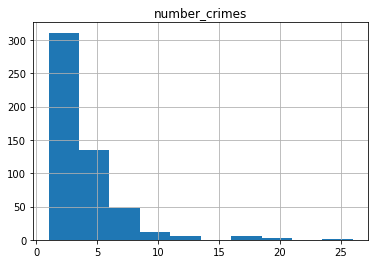

In [59]:
# histogram of number crimes
df_high_school_data.hist(column='number_crimes')

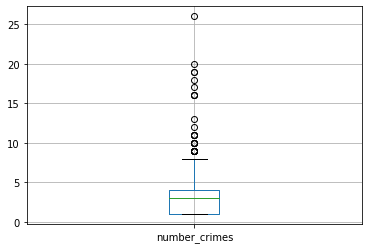

In [61]:
# box plot of number_crimes
df_high_school_data.boxplot(column='number_crimes')

#### Determine how many clusters will be optimum to use with k-mean machine learning algorithm

In [69]:
import warnings
warnings.filterwarnings('ignore')

# prepare data for clustering
high_school_clustering = df_high_school_data[['number_crimes', 'state']]
high_school_clustering['state'] = high_school_clustering['state'].replace(to_replace='NY', value=1.0, inplace=False, limit=None, regex=False, method='pad')
print("shape of data for clustering:")
print(high_school_clustering.shape)
print("sample of data for clustering:")
print(high_school_clustering.head())

shape of data for clustering:
(521, 2)
sample of data for clustering:
   number_crimes  state
0              4    1.0
1              2    1.0
2              2    1.0
3              1    1.0
4              1    1.0


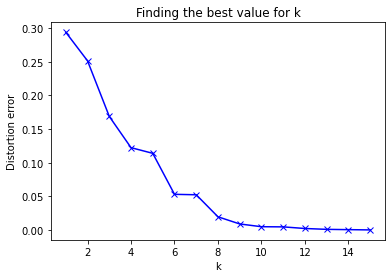

In [80]:
# initialise variables
error = []
range_k = range(1,16)

# iterate over multiple values for k
for kclusters in range_k:
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(high_school_clustering)
    # capture the distortion error
    number_rows = high_school_clustering.shape[0]
    error.append(sum(np.min(cdist(high_school_clustering, kmeans.cluster_centers_, 'canberra'), axis=1)) / number_rows)

# Plot error based on various values of k
plt.title('Finding the best value for k')
plt.plot(range_k, error, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion error')
plt.show()

The author will use k = 6 (the elbow) for optimal number of clusters

#### Cluster the high school data


In [81]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(high_school_clustering)

# check the first twenty cluster labels generated
kmeans.labels_[0:20]

array([0, 4, 4, 1, 1, 1, 4, 1, 0, 4, 3, 1, 4, 4, 4, 4, 1, 0, 1, 4],
      dtype=int32)

In [82]:
# add clustering labels
df_high_school_data.insert(0, 'Cluster Labels', kmeans.labels_)
print(df_high_school_data.head())

   Cluster Labels                  venue_id                high_school_name  \
0               0  408ef400f964a520daf21ee3  Life Sciences Secondary School   
1               4  44ea05f6f964a520be371fe3  Brooklyn Technical High School   
2               4  453160c1f964a520723b1fe3      Hunter College High School   
3               1  4a17449ff964a52042791fe3    Lower Manhattan Arts Academy   
4               1  4a6a56fcf964a52027cd1fe3          Automotive High School   

           school_lat          school_lng      city state        country  \
0   40.78353529745015   -73.9457278380966  New York    NY  United States   
1   40.68891796018726  -73.97656063519383  Brooklyn    NY  United States   
2  40.785497244106836  -73.95400428341242  New York    NY  United States   
3  40.716911718587674  -73.98954323579125  New York    NY  United States   
4  40.722386518876164  -73.95325177236187  New York    NY  United States   

   number_crimes  
0              4  
1              2  
2          

In [83]:
# drop any rows with null
print("Before dropna", df_high_school_data.shape)
df_high_school_data.dropna()
print("After dropna", df_high_school_data.shape)

Before dropna (521, 9)
After dropna (521, 9)


In [84]:
# check how many schools per cluster
print(df_high_school_data['Cluster Labels'].value_counts())

4    171
1    140
0    135
5     48
3     18
2      9
Name: Cluster Labels, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b5f05f490>]],
      dtype=object)

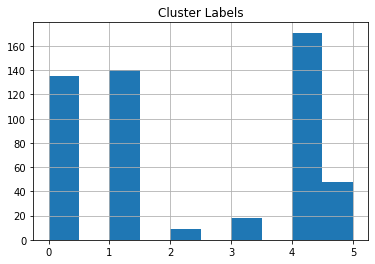

In [94]:
# histogram of clustering labels vs number of schools
df_high_school_data.hist(column='Cluster Labels')

In [99]:
# box plots of number of crimes distribution for each cluster
df_cluster_0 = df_high_school_data.loc[(df_high_school_data['Cluster Labels'] == 0)]
df_cluster_1 = df_high_school_data.loc[(df_high_school_data['Cluster Labels'] == 1)]
df_cluster_2 = df_high_school_data.loc[(df_high_school_data['Cluster Labels'] == 2)]
df_cluster_3 = df_high_school_data.loc[(df_high_school_data['Cluster Labels'] == 3)]
df_cluster_4 = df_high_school_data.loc[(df_high_school_data['Cluster Labels'] == 4)]
df_cluster_5 = df_high_school_data.loc[(df_high_school_data['Cluster Labels'] == 5)]


Cluster 0 - number crimes
AxesSubplot(0.125,0.125;0.775x0.755)


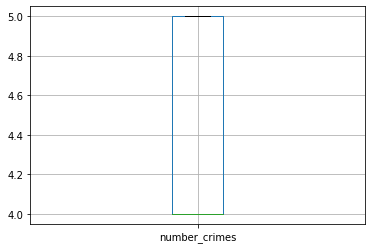

In [114]:
print("Cluster 0 - number crimes")
print(df_cluster_0.boxplot(column='number_crimes'))

In [115]:
print(df_cluster_0.describe())

       Cluster Labels  number_crimes
count           135.0     135.000000
mean              0.0       4.333333
std               0.0       0.473160
min               0.0       4.000000
25%               0.0       4.000000
50%               0.0       4.000000
75%               0.0       5.000000
max               0.0       5.000000


Cluster 1 - number crimes
AxesSubplot(0.125,0.125;0.775x0.755)


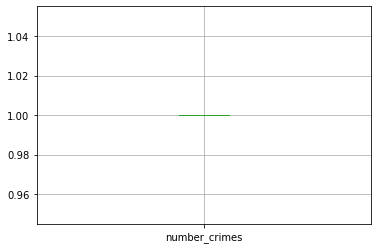

In [108]:
print("Cluster 1 - number crimes")
print(df_cluster_1.boxplot(column='number_crimes'))

In [116]:
print(df_cluster_1.describe())

       Cluster Labels  number_crimes
count           140.0          140.0
mean              1.0            1.0
std               0.0            0.0
min               1.0            1.0
25%               1.0            1.0
50%               1.0            1.0
75%               1.0            1.0
max               1.0            1.0


Cluster 2 - number crimes
AxesSubplot(0.125,0.125;0.775x0.755)


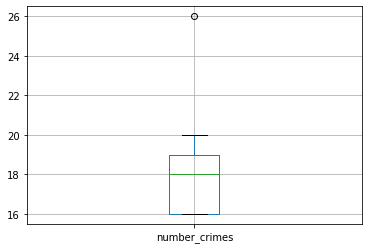

In [109]:
print("Cluster 2 - number crimes")
print(df_cluster_2.boxplot(column='number_crimes'))

In [117]:
print(df_cluster_2.describe())

       Cluster Labels  number_crimes
count             9.0       9.000000
mean              2.0      18.555556
std               0.0       3.166667
min               2.0      16.000000
25%               2.0      16.000000
50%               2.0      18.000000
75%               2.0      19.000000
max               2.0      26.000000


Cluster 3 - number crimes
AxesSubplot(0.125,0.125;0.775x0.755)


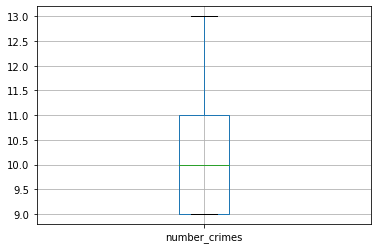

In [110]:
print("Cluster 3 - number crimes")
print(df_cluster_3.boxplot(column='number_crimes'))

In [118]:
print(df_cluster_3.describe())

       Cluster Labels  number_crimes
count            18.0      18.000000
mean              3.0      10.111111
std               0.0       1.182663
min               3.0       9.000000
25%               3.0       9.000000
50%               3.0      10.000000
75%               3.0      11.000000
max               3.0      13.000000


Cluster 4 - number crimes
AxesSubplot(0.125,0.125;0.775x0.755)


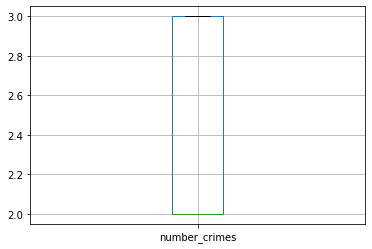

In [111]:
print("Cluster 4 - number crimes")
print(df_cluster_4.boxplot(column='number_crimes'))

In [119]:
print(df_cluster_4.describe())

       Cluster Labels  number_crimes
count           171.0     171.000000
mean              4.0       2.432749
std               0.0       0.496912
min               4.0       2.000000
25%               4.0       2.000000
50%               4.0       2.000000
75%               4.0       3.000000
max               4.0       3.000000


Cluster 5 - number crimes
AxesSubplot(0.125,0.125;0.775x0.755)


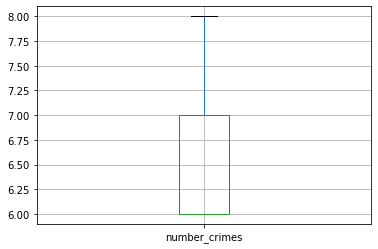

In [112]:
print("Cluster 5 - number crimes")
print(df_cluster_5.boxplot(column='number_crimes'))

In [120]:
print(df_cluster_5.describe())

       Cluster Labels  number_crimes
count            48.0      48.000000
mean              5.0       6.625000
std               0.0       0.732963
min               5.0       6.000000
25%               5.0       6.000000
50%               5.0       6.000000
75%               5.0       7.000000
max               5.0       8.000000


# 5. Results

#### Visulise the clustered high schools that had crime nearby

In [86]:
# create map
map_clusters = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, name, number_crimes, cluster in zip(df_high_school_data['school_lat'], df_high_school_data['school_lng'], df_high_school_data['high_school_name'], df_high_school_data['number_crimes'], df_high_school_data['Cluster Labels']):
    label = folium.Popup('High school: ' + name + ', Nearby Crimes: ' + str(number_crimes) + ', Cluster: ' + str(cluster), parse_html=True)
    
    folium.CircleMarker(
        [float(lat), float(lon)],
        radius=5,
        popup=label,
        color=rainbow[int(cluster) -1],
        fill=True,
        fill_color=rainbow[int(cluster) -1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

#### Legend for clustered high schools

In [129]:
# colour codes for clusters
for i in range(0,6):
    print("Cluster", i, rainbow[i - 1])


Cluster 0 #ff0000
Cluster 1 #8000ff
Cluster 2 #1996f3
Cluster 3 #4df3ce
Cluster 4 #b2f396
Cluster 5 #ff964f


Align tables left in cells

In [128]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>


| Cluster number | Number crimes | Colour                         |
| :------------- | :------------ | :----------------------------- |
|        1       |       1       | <font color='#8000ff'>0</font> |
|        4       |     2 - 3     | <font color='#b2f396'>0</font> |
|        0       |     4 - 5     | <font color='#ff0000'>0</font> |
|        5       |     6 - 8     | <font color='#ff964f'>0</font> |
|        3       |     9 - 13    | <font color='#4df3ce'>0</font> |
|        2       |    16 - 26    | <font color='#1996f3'>0</font> |

#### Find top 20 most at risk high schools

In [133]:
df_at_risk = df_high_school_data[['high_school_name', 'city', 'number_crimes', 'school_lat', 'school_lng']]
df_at_risk.sort_values(by=['number_crimes'], ascending=False, inplace=True)
df_at_risk.reset_index(inplace=True, drop=True)
df_most_at_risk = df_at_risk.head(20)
df_most_at_risk = df_most_at_risk[['high_school_name', 'number_crimes', 'city']]
print("Top twenty most at-risk high schools in 2019")
print(df_most_at_risk)

Top twenty most at-risk high schools in 2019
                                     high_school_name  number_crimes      city
0                           The Brooklyn Latin School             26  Brooklyn
1   The Young Women's Leadership School of East Ha...             20  New York
2                                 The Heritage School             19  New York
3                              Cristo Rey High School             19  New York
4                                     Magistri Lounge             18  New York
5                                 Central Park East 1             17  New York
6                                     Williamsburg HS             16  Brooklyn
7       Williamsburg High School of Arts + Technology             16  Brooklyn
8                       Central Park East High School             16  New York
9                              Liberation High School             13  Brooklyn
10     Unity Preparatory Charter School - High School             12  Brooklyn
11     

#### Visulise most at risk high schools

In [160]:
df_top_twenty = df_at_risk.head(20)

# create map of top twenty at risk schools
map_top_twenty = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# add markers to map
for high_school_name, number_crimes, school_lat, school_lng in zip(df_top_twenty['high_school_name'], df_top_twenty['number_crimes'], df_top_twenty['school_lat'], df_top_twenty['school_lng']):
    label = '{}, Nearby crimes: {}'.format(high_school_name, number_crimes)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [float(school_lat), float(school_lng)],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_top_twenty)  

print("Most at risk high-schools in 2019")
map_top_twenty

Most at risk high-schools in 2019


#### Horizontal bar plot of top twenty at risk high schools

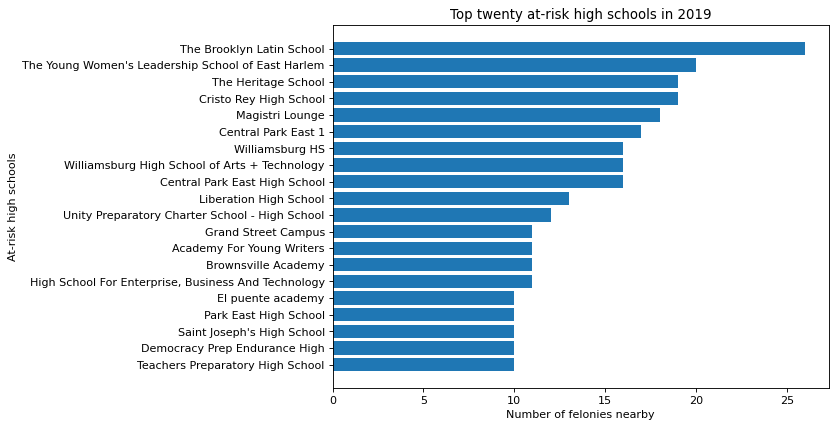

In [168]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

schools = np.flip(df_top_twenty['high_school_name'].to_numpy())
crimes = np.flip(df_top_twenty['number_crimes'].to_numpy())
plt.barh(schools, crimes)
plt.title('Top twenty at-risk high schools in 2019')
plt.ylabel('At-risk high schools')
plt.xlabel('Number of felonies nearby')
plt.show()

# 6. Discussion

### 6.1 Key observations:

1. There were 521 high schools that had a felony, involving a dangerous weapon, committed within a 500 m radius from the scool in 2019
2. Most of these schools were segmented into cluster 4, 1 and 0
3. The least number of schools were segmented into cluster 2, followed by cluster 3 and 5
4. The top-twenty at-risk high schools were mostly located in Brooklyn and New York city
5. The top-twenty high schools appeared in approximately 5 areas on the map and in each area, the schools were fairly close to each other.

### 6.2 Recommendations:

1. Do more comprehensive research about all crime around the top twenty schools
2. Do an impact analysis to find out how affected high school children
3. Consider the demographics of the local areas when doing more comprehensive research
4. Involve the local high schools in the research project and share the research in an open source way with local authorities and schools so they can take action to reduce crime in their areas.

# 7. Conclusion

### 7.1 Summary

The author set out to identify the top-twenty most at-risk high schools in New York state, using crime data from the NYPD and school location data from Foursquare and identify what areas of New York state are most affected. The audience that this research may be useful to is law enforcement, public bodies and social organisations that may be interested in using this research as input into decision-making relating to where to focus limited resources.

The author has identified 521 high schools in New York state that had at least one felony involving a dangerous weapon that was within a 500 m radius from the school in 2019. These schools were clustered using a K-means machine learning algorithm into six clusters and mapped these schools. The author then identified the top-twenty most at risk high schools based on number of felonies nearby. For the top-twenty schools, the number of felonies involving a dangerous weapon ranged from 10 to 26 felonies per school. Eight of these schools were in Brooklyn and 12 of these schools were in New York. The top 3 at risk high schools were: The Brooklyn Latin School, The Young Women's Leadership School of East Harlem and The Heritage School.

### 7.2 Limitations of this research 

The limitation of this research are:

1. Foursquare data may not have included all schools in New York state, so some at-risk schools may not have been identified.
2. The data relates to crimes in 2019, pre-Covid, and data for 2020 and 2021 is likely to have changed due to various forms of lock-down and restriction of movement.
3. The author attempted to capture crimes before and after school hours, but did not distinguish between school-days and non-school days, like weekends, public holidays and school holidays.
4. Due to time constraints, a thorough literature review was not carried out, nor was this resarch peer-reviewed.

### 7.3 Follow-on research

A potential future direction for related research could be to consider only school-days and to compare this data over time to see how crime is changing over time. It might also be useful to include other crimes and then segment neighborhoods by level of crime mix near schools.
